# Loan Approval Prediction Model

This model takes a dataset of 12 features to predict whether an individuals loan status can be Approved or Rejected
1. loan_id - Unique identifier for each entry
2. no_of_dependents - The number of dpendents an individual is responsible for
3. education - The education status of the individual. "Graduate" or "Not Graduate"
4. self_employed - Whether the individual is an entrepreneur or not. "Yes" or "No"
5. income_annum - The annual income of the individual.
6. loan_amount - The loan amount requested by the individual.
7. loan_term - The duration in months of how long before the Loan return is due.
8. cibil_score - A three-digit number that summarizes your credit history and creditworthiness, 300–900, with 900 being the best.
9. residential_assets_value - The value of all residential assets owned by indiviual placed up as collateral for the loan.
10. commercial_assets_value - The value of all commercial assets owned by individual placed up as collateral for the loan.
11. luxury_assets_value - The value of all luxury assets owned by individual placed up as collateral for the loan.
12. bank_asset_value - The value of all assets in the bank owned by the individual.
13. loan_status - Whether the individuals loan request was "Approved" or "Rejected".

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report


#Load the dataset
original_dataset = pd.read_csv('./loan_approval_dataset.csv')
original_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Understanding the dataset

In [2]:
len(original_dataset)

4269

In [3]:
#Search for missing values
original_dataset.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
#Search for duplicated values
original_dataset.duplicated().sum()

0

In [5]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
original_dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Cleaning the dataset

In [7]:
#Strip the whitespaces in the column name of the dataset
original_dataset.columns = original_dataset.columns.str.strip()

#Strip the extra whitespaces contained in each string/object entries in the dataset
for col in original_dataset.columns:
    if original_dataset[col].dtype == 'object':
        original_dataset[col] = original_dataset[col].str.strip()

In [8]:
#Convert datatype of categorical column to ordered categories
original_dataset['education'] = original_dataset['education'].astype('category').cat.set_categories(new_categories=['Not Graduate', 'Graduate'], ordered=True)
original_dataset['self_employed'] = original_dataset['self_employed'].astype('category').cat.set_categories(new_categories=['No', 'Yes'], ordered=True)
original_dataset['loan_status'] = original_dataset['loan_status'].astype('category').cat.set_categories(new_categories=['Rejected', 'Approved'], ordered=True)

## Visualization of dataset

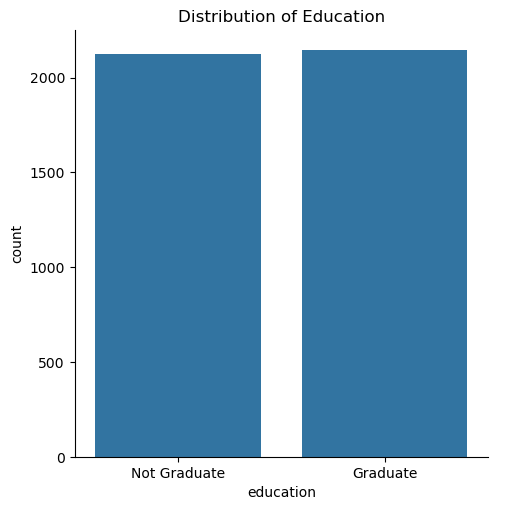

In [9]:
sns.catplot(data=original_dataset, x='education', kind='count').set(title='Distribution of Education')
plt.show()


The counts for both categories are fairly similar, meaning that there’s roughly an equal number of *"Graduate"* and *"Not Graduate"* individuals in the dataset.
We don't have to worry about feature imbalance which might end up affecting our model.

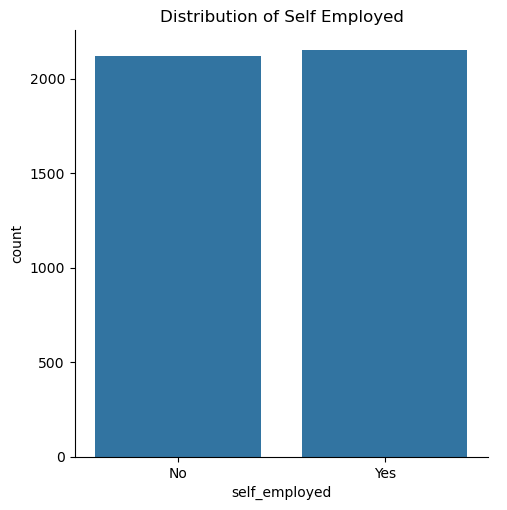

In [10]:
sns.catplot(data=original_dataset, x='self_employed', kind='count').set(title='Distribution of Self Employed')
plt.show()

The counts for both categories are fairly similar, meaning that there’s roughly an equal number of *"Yes"* and *"No"* individuals under the *self_employed* column in the dataset.
We don't have to worry about feature imbalance which might end up affecting our model.

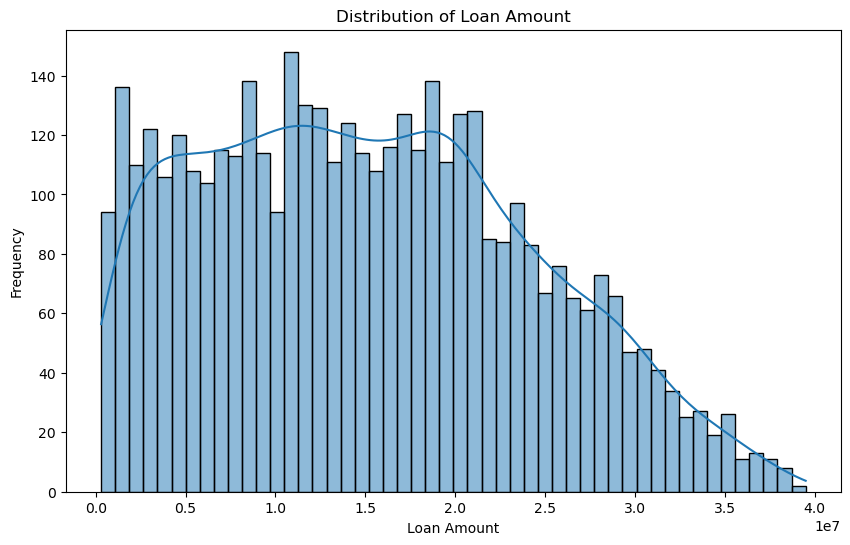

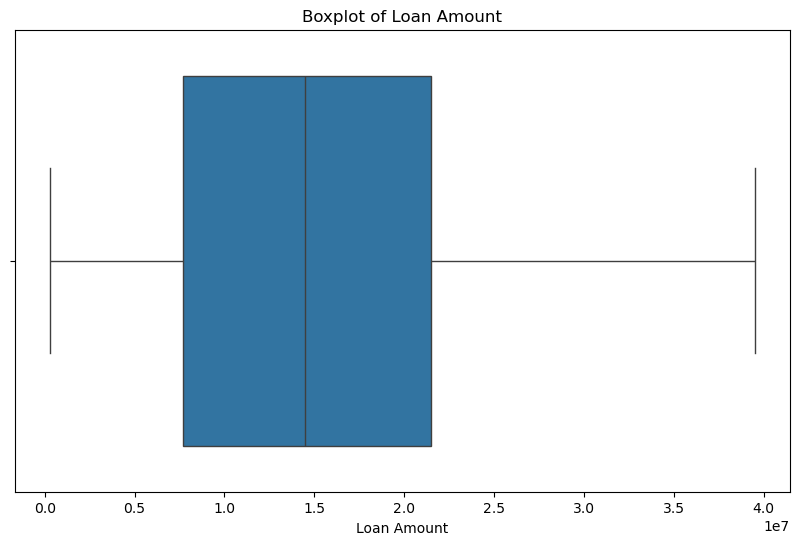

In [11]:
# Histogram for the distribution of 'loan_amount'
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset['loan_amount'], bins=50, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the distribution of 'loan_amount' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=original_dataset['loan_amount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

- The distribution is right-skewed (positively skewed), with most of the values concentrated in the lower loan amount range.
- There is a peak in frequency around the lower end of the loan amount, followed by a gradual decline as loan amount increase.
- A small number of individuals requested for very high loan amount, as shown by the long tail on the right.
- This distribution could affect modeling. Depending on the model, transforming the data (e.g., log transformation) to reduce skewness will be put into considerations.
- In the Box-Plot loan amount is more centralized around its median, implying less variation.

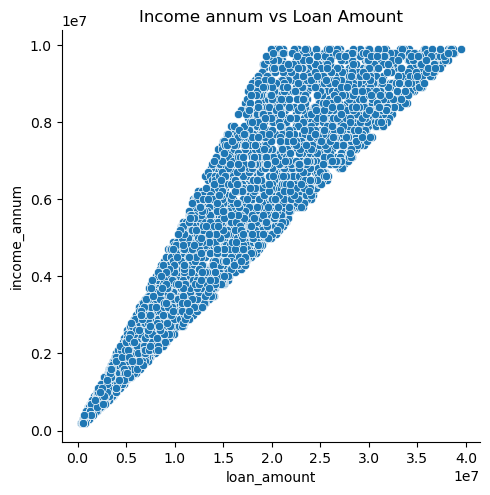

In [12]:
sns.relplot(x='loan_amount', y='income_annum', kind='scatter', data=original_dataset).set(title='Income annum vs Loan Amount')
plt.show()

- The points form a triangular pattern, starting from the origin (0,0) and widening as both income and loan amount increase. Which show a direct, proportional relationship between income and loan amount. Higher annual income generally correlates with a higher loan amount.

- We can see that as income increases, the data points cover a wider range of loan amounts, meaning that people with higher income levels may take loans of varying amounts, from small to large.

-  The edge of the triangular shape implies an upper limit, where for each income level, there’s a maximum loan amount that individuals or entities tend not to exceed. This boundary could represent a threshold or limit set by financial institutions.

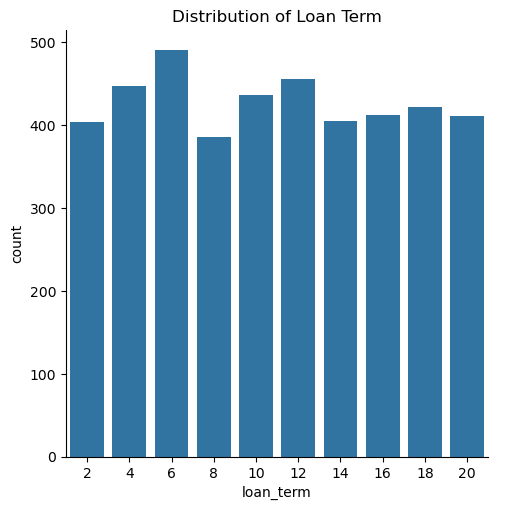

In [13]:
sns.catplot(x='loan_term', data=original_dataset, kind='count').set(title='Distribution of Loan Term')
plt.show()

- There is a noticeable variation across terms, but overall, the counts are relatively balanced, with no extreme peaks or troughs, meaning there is a demand across a range of loan terms rather than a concentration around one specific term.

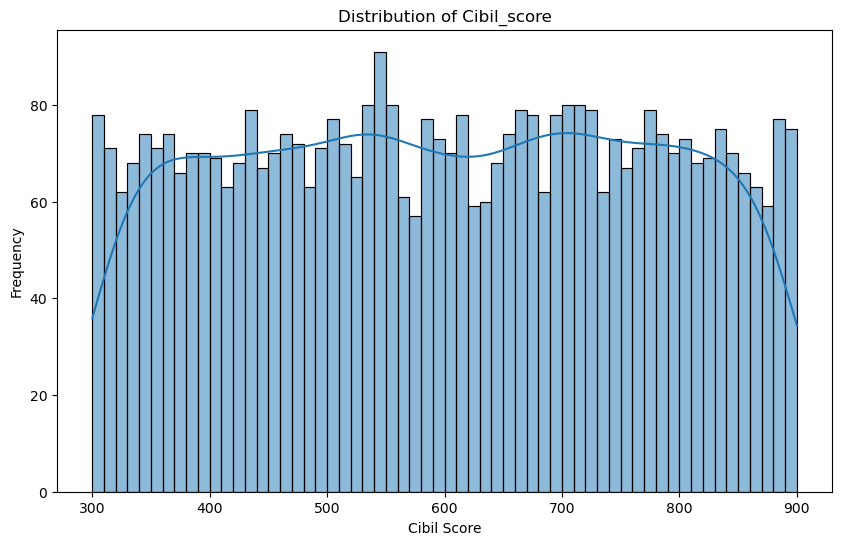

In [14]:
# Histogram for the distribution of 'loan_amount'
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset['cibil_score'], bins=60, kde=True)
plt.title('Distribution of Cibil_score')
plt.xlabel('Cibil Score')
plt.ylabel('Frequency')
plt.show()


* The distribution appears fairly uniform across the score range, with no drastic peaks or dips, indicating a relatively even spread of scores across this dataset.
* There are minor fluctuations in frequency, but overall, scores are fairly evenly represented from around 300 to 900.

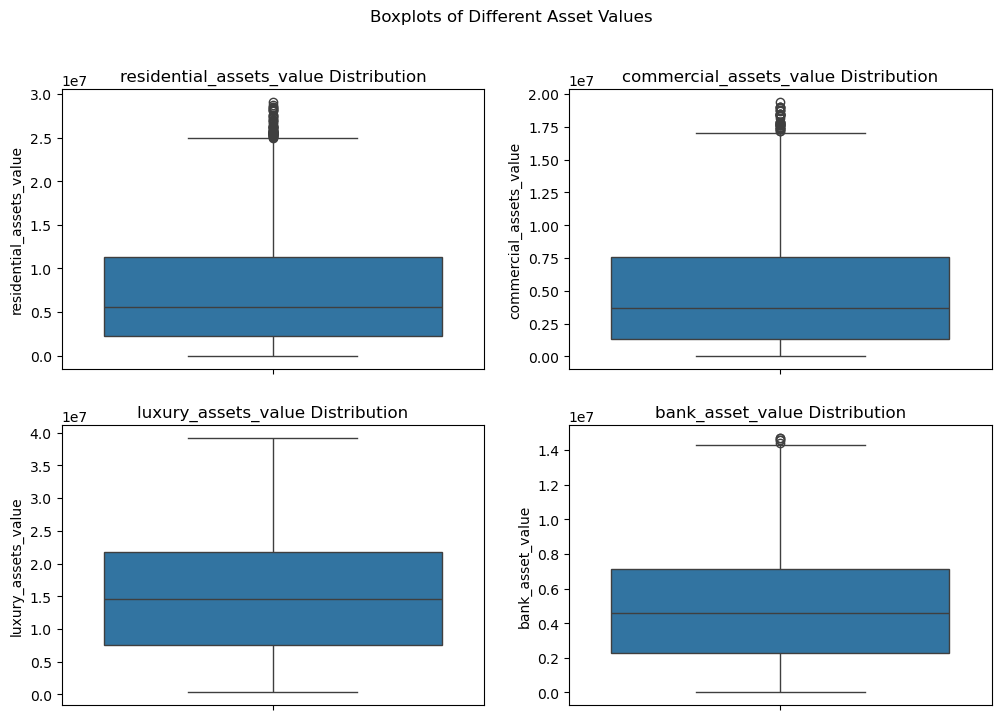

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplots of Different Asset Values')

asset_columns = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for ax, asset in zip(axes.flatten(), asset_columns):
    sns.boxplot(data=original_dataset, y=asset, ax=ax)
    ax.set_title(f'{asset} Distribution')



plt.show()

- Each asset category shows some level of variability, with outliers present in 3 categories, though more prominently in residential and commercial assets.
- Luxury and bank assets are relatively more centralized around their medians, implying less variation compared to the others.
- The variation and the presence of outliers could impact the dataset's overall distribution and may influence modeling, especially if these outliers affect model predictions.

The outliers are handled by capping/flooring the extreme values to the upper/lower bound of a defined range.
This allows for retaining of all data but reduce the impact of extreme values.

In [16]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply the function to each asset column
for col in asset_columns:
    df = cap_outliers(original_dataset, col)

# Check the resulting values
print(df[asset_columns].describe())

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.454861e+06             4.964289e+06         1.512631e+07   
std                6.452442e+06             4.363080e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.495000e+07             1.705000e+07         3.920000e+07   

       bank_asset_value  
count      4.269000e+03  
mean       4.976341e+06  
std        3.249159e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.430000e+07  


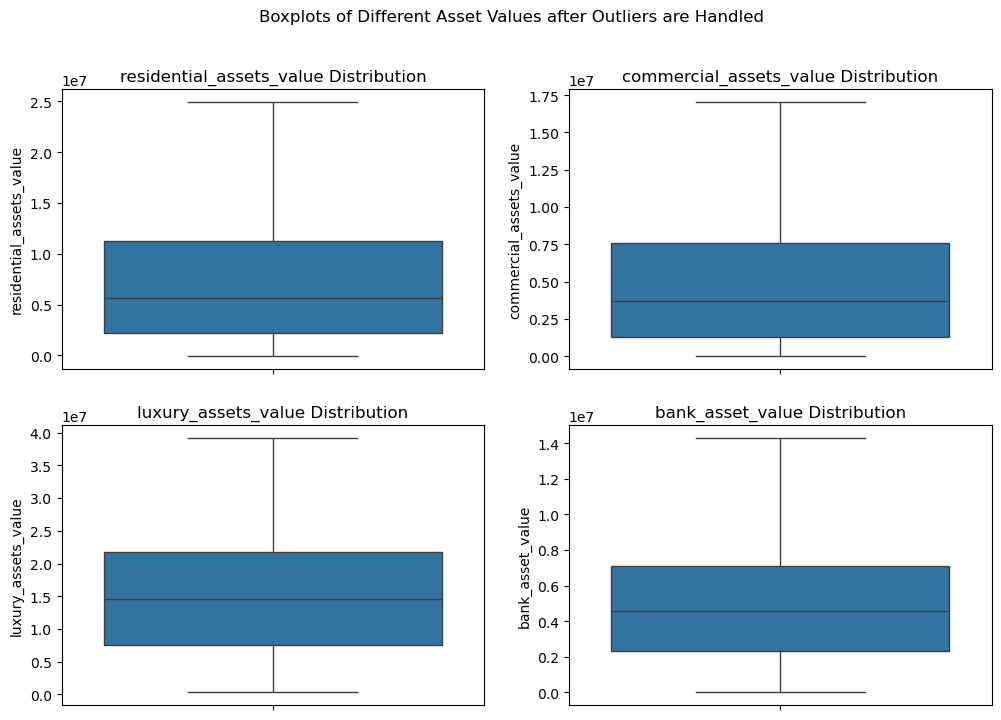

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplots of Different Asset Values after Outliers are Handled')

for ax, asset in zip(axes.flatten(), asset_columns):
    sns.boxplot(data=original_dataset, y=asset, ax=ax)
    ax.set_title(f'{asset} Distribution')



plt.show()

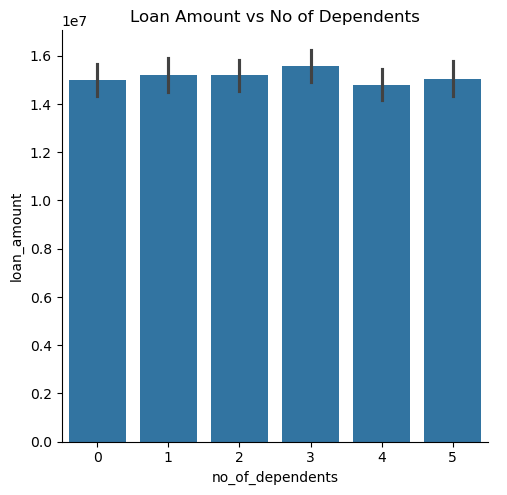

In [18]:
sns.catplot(x='no_of_dependents', y='loan_amount', data=original_dataset, kind='bar').set(title='Loan Amount vs No of Dependents')
plt.show()

- This graph suggests that lenders do not significantly adjust loan amounts based on the number of dependents a borrower has. The loan amount remains fairly stable regardless of whether the applicant has no dependents or up to five.

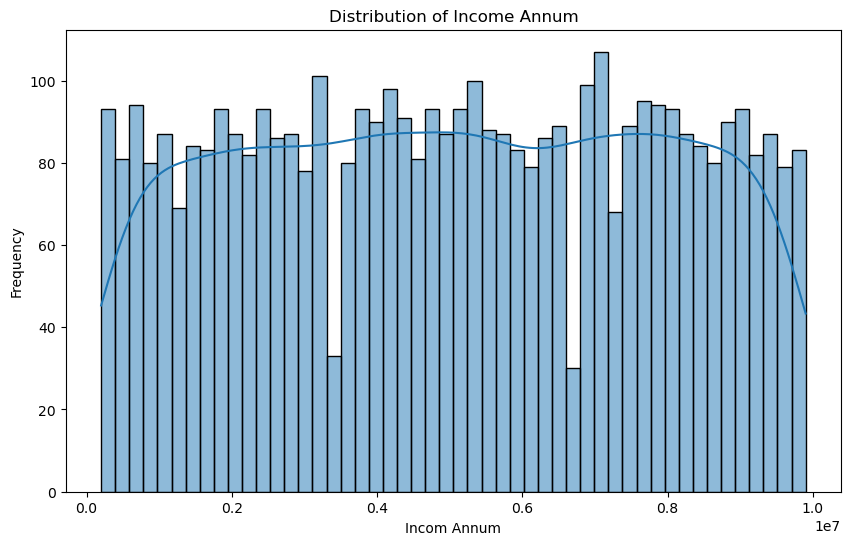

In [19]:
# Histogram for the distribution of 'income_annum'
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset['income_annum'], bins=50, kde=True)
plt.title('Distribution of Income Annum')
plt.xlabel('Incom Annum')
plt.ylabel('Frequency')
plt.show()


* The distribution appears fairly uniform across the income range, with no drastic peaks or dips, indicating a relatively even spread of income annum across this dataset.
* There are minor fluctuations in frequency, but overall, income are fairly evenly represented from around 0 to 10,000,000.

In [20]:
#Taking the sum of all the assets column together as 'total_assets'
original_dataset['total_assets'] = original_dataset[asset_columns].sum(axis=1)

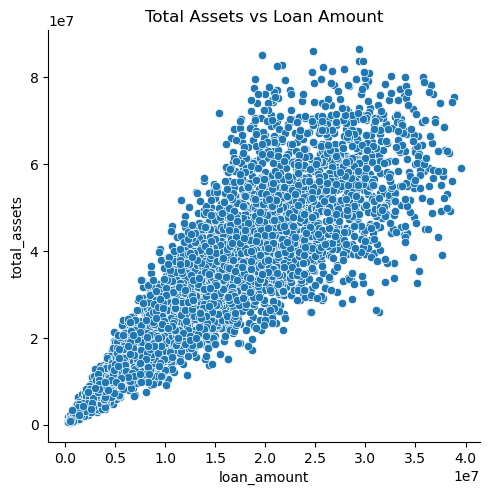

In [21]:
sns.relplot(x='loan_amount', y='total_assets', kind='scatter', data=original_dataset).set(title='Total Assets vs Loan Amount')

plt.show()

- The graph suggests that people with higher assets are more likely to request or be approved for higher loan amounts, shown by the obvious upwards trend.
- But the relationship is not strictly linear, with presence of variability, particularly at higher asset and loan values. 
- This positive correlation is expected, as individuals or entities with more assets often have greater capacity to handle larger loans.

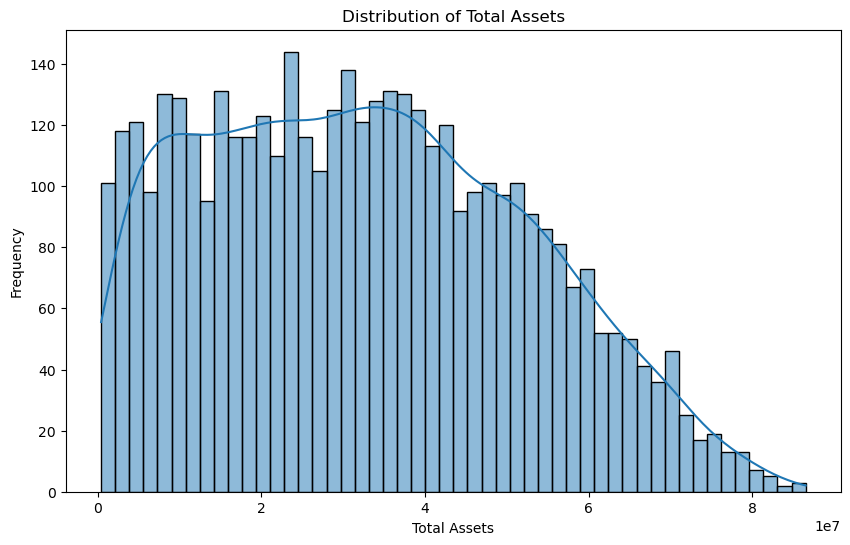

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset['total_assets'], bins=50, kde=True)
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Frequency')
plt.show()

- The distribution is right-skewed (positively skewed), with most of the values concentrated in the lower asset range.
- There is a peak in frequency around the lower end of the asset values, followed by a gradual decline as asset values increase.
- A small number of individuals have very high asset values, as shown by the long tail on the right.
- This distribution could affect modeling. Depending on the model, transforming the data (e.g., log transformation) to reduce skewness will be put into considerations.


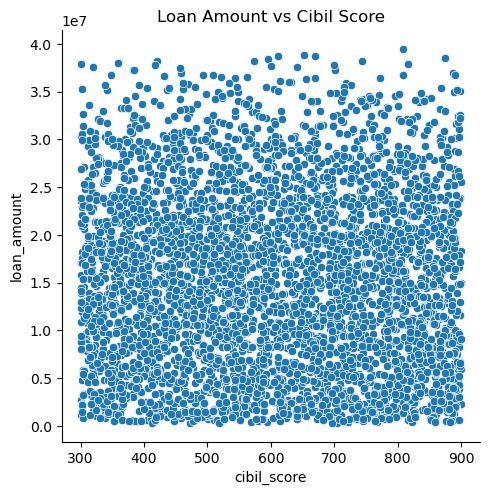

In [23]:
sns.relplot(x='cibil_score', y='loan_amount', kind='scatter', data=original_dataset).set(title='Loan Amount vs Cibil Score')

plt.show()

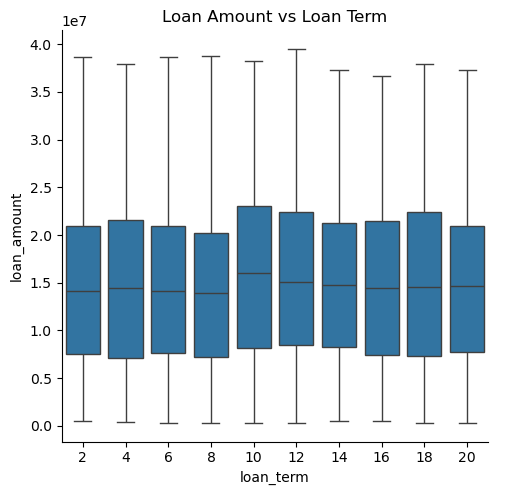

In [24]:
sns.catplot(x='loan_term', y='loan_amount', data=original_dataset, kind='box').set(title='Loan Amount vs Loan Term')
plt.show()

## Preparation of dataset for modeling

In [25]:
# Since this is a binary category, it can be represented in the binary variable (1 or 0).
original_dataset['loan_status'] = original_dataset['loan_status'].map({'Rejected':0, 'Approved':1})

original_dataset = pd.get_dummies(original_dataset, columns=['education', 'self_employed'], drop_first=True)

In [26]:
original_dataset.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,education_Graduate,self_employed_Yes
0,1,2,9600000,29900000,12,778,2400000.0,17050000.0,22700000,8000000.0,1,50150000.0,True,False
1,2,0,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,0,17000000.0,False,True
2,3,3,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,0,57700000.0,True,False
3,4,3,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,0,52700000.0,True,False
4,5,5,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,0,55000000.0,False,True


In [27]:
X = original_dataset.drop(['loan_status', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_id'], axis=1)
Y = original_dataset['loan_status']

In [28]:
#Log tranformation of column with skewed distribution
X['loan_amount'] = np.log(X['loan_amount'] + 1)
X['total_assets'] = np.log(X['total_assets'] + 1)

In [29]:
#Standardization of the income_annum column
scaler = StandardScaler()
X['income_annum'] = scaler.fit_transform(X[['income_annum']])

C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

## Modeling of the data

In [30]:
#Split X and Y into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

#Instantiate the LinearSVC model
lsvc = LinearSVC(random_state=42)

#Fit the model to the training data
lsvc.fit(X_train, Y_train)

#Predict the target variable
y_preds = lsvc.predict(X_test)


C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [31]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       323
           1       0.90      0.95      0.93       531

    accuracy                           0.91       854
   macro avg       0.91      0.89      0.90       854
weighted avg       0.91      0.91      0.90       854



C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\miniconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

- Precision: Out of all the entries that the model predicted would get approved for a loan, only 90% actually did and Out of all the entries that the model predicted would not get approved for a loan, only 91% actually didn't.

- Recall: Out of all the entries that did get approved for a loan, the model predicted the outcome correctly for 95% of them and Out of all the entries that got rejected for a loan, the model predicted it correctly for about 83% of them.

1 - Approved - 531

0 - Rejected - 323

Overall the model is 91% accurate

This means the model could be improved in the direction of predicting correctly people that got rejected for a loan. I advise adding more data entries that have Rejected has their loan status to balance the Approved and Rejected variables.

In [32]:
importance_df = pd.Series(abs(lsvc.coef_.flatten()), index=X.columns).sort_values(ascending=False)

print(importance_df)

total_assets          0.188884
income_annum          0.102603
loan_term             0.060885
loan_amount           0.044222
no_of_dependents      0.020857
education_Graduate    0.012090
cibil_score           0.006274
self_employed_Yes     0.003764
dtype: float64


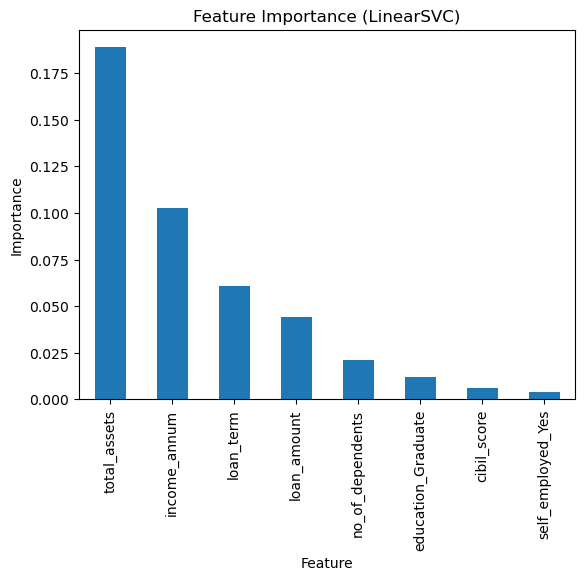

In [33]:
importance_df.plot(kind='bar')
plt.title('Feature Importance (LinearSVC)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()